In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('Amazon Scraping Reviews.csv')

In [3]:
df.head()

,rev
0,\nThank you amazon for sending its before pujo and the product is amazing\n
1,\nGood quality but little tight near the laces\n
2,"\nColour was different. In picture it is shown black,in real it was blue. Shoe laces are too small. Not as expected.\n"
3,\nLooking good & quality also better\n
4,\nvery bad product\n


In [4]:
data=df.copy()

In [5]:
data['rev']=data['rev'].apply(lambda x:x.strip('\n'))

In [6]:
data.head()

,rev
0,Thank you amazon for sending its before pujo and the product is amazing
1,Good quality but little tight near the laces
2,"Colour was different. In picture it is shown black,in real it was blue. Shoe laces are too small. Not as expected."
3,Looking good & quality also better
4,very bad product


In [7]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhijit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
STOPWORDS=stopwords.words("english")

In [19]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [20]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [21]:
data['cleaned_rev']=data['rev'].apply(lambda x:clean_text(x))

In [22]:
data.sample(5)

,rev,cleaned_rev
4003,Good one,good one
2883,Don't buy... Waste of money,dont buy wast money
3409,Awesome Product. Got it at ₹730 . MRP is ₹3499 . Must buy.,awesom product got 730 mrp 3499 must buy
58,"Soo comfortable and fit.love you puma!!Tip: select one size larger than usualAlways on amazon before purchasing any item ,see if the seller is cloudtail india.(original quality)",soo comfort fitlov pumatip select one size larger usualalway amazon purchas item see seller cloudtail indiaorigin qualiti
1738,Good,good


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


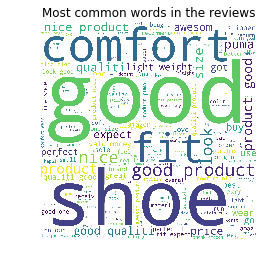

In [25]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(data['cleaned_rev'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

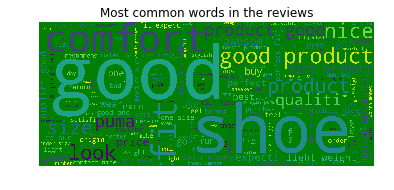

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=3000, width=7000, background_color='green')
wordcloud = wordcloud.generate(' '.join(data['cleaned_rev'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [27]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [29]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [30]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

In [31]:
data['sentiment_score']=data['rev'].apply(lambda x:compound_score(x))

In [32]:
data.sample(7)

,rev,cleaned_rev,sentiment_score
4168,Just got it today. Color is awesome see pics uploaded by me. Fit is good. Measure your size of fit & chose accordingly i bought UK 9 - 28cm.Pros.1. Color is very good2. Fit is very good.3. Light weight. Unlike puma rebound shoes it is very light. Lighter than puma dp 6 (canvas) shoes.4. Air space is given so it would be very comfortable & stylishCons :1. Shoe got line after first wear. It is natural but still.I will review it after 1 month & 6 month to update how durable they are.,got today color awesom see pic upload fit good measur size fit chose accordingli bought uk 9 28cmpros1 color good2 fit good3 light weight unlik puma rebound shoe light lighter puma dp 6 canva shoes4 air space given would comfort stylishcon 1 shoe got line first wear natur stilli review 1 month 6 month updat durabl,0.8688
3977,Worth for money!! Superb product.,worth money superb product,0.7639
3810,Worst,worst,-0.6249
1753,Sooperrrr quality for the price paid,sooperrrr qualiti price paid,0.0000
2233,Value for money product,valu money product,0.3400
4518,"It has a snug fit, good rubber that doesn't cause skin irritation. The sole wear out after 25-30 days of normal usage and tends to get quite gripless, so watch out for falls.",snug fit good rubber doesnt caus skin irrit sole wear 2530 day normal usag tend get quit gripless watch fall,0.7965
333,Nice product with amazing colour and quality is awesome.,nice product amaz colour qualiti awesom,0.8934


In [33]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [34]:
data['reviews_category']=data['sentiment_score'].apply(lambda x:sentiment_category(x))

In [35]:
data.sample(7)

,rev,cleaned_rev,sentiment_score,reviews_category
4306,Excellent,excel,0.5719,positive
3219,Good shoes at this price. I liked it,good shoe price like,0.6908,positive
3627,Ok,ok,0.2960,positive
4532,"Very good and not at all costly , value for money",good costli valu money,0.7086,positive
3190,Good product,good product,0.4404,positive
4434,Good product,good product,0.4404,positive
3359,Nice product,nice product,0.4215,positive


Text(0.5, 1.0, 'Distribution of Reviews Category')

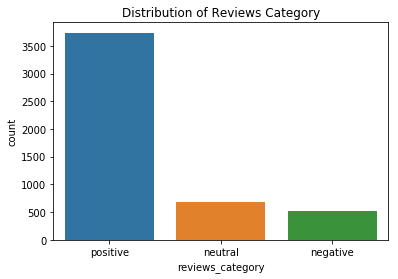

In [36]:
sns.countplot(data['reviews_category']).set_title("Distribution of Reviews Category")

In [37]:
positive_reviews=data.loc[data['reviews_category']=='positive','cleaned_rev'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

['thank amazon send pujo product amaz',
 'good qualiti littl tight near lace',
 'look good qualiti also better',
 'super',
 'valu money']

In [38]:
negative_reviews=data.loc[data['reviews_category']=='negative','cleaned_rev'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

['bad product', 'defect', 'qualiti good expect', 'bad product', 'defect']

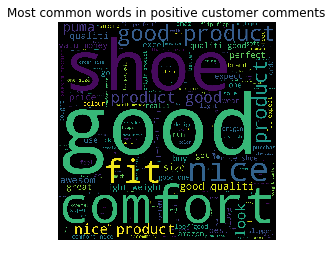

In [39]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(data.loc[data['reviews_category']=='positive','cleaned_rev'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

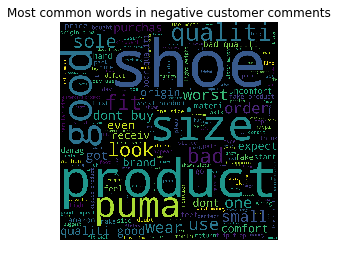

In [41]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(data.loc[data['reviews_category']=='negative','cleaned_rev'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

In [42]:
from collections import Counter

In [43]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [44]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [45]:
top_20_positive_review_words

[('good', 1706),
 ('product', 1168),
 ('nice', 720),
 ('shoe', 669),
 ('comfort', 608),
 ('fit', 558),
 ('qualiti', 487),
 ('size', 425),
 ('look', 295),
 ('puma', 283),
 ('like', 275),
 ('price', 271),
 ('one', 242),
 ('perfect', 237),
 ('awesom', 228),
 ('buy', 191),
 ('expect', 179),
 ('light', 177),
 ('money', 171),
 ('best', 163)]

In [46]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

In [47]:
top_20_negative_review_words

[('product', 183),
 ('shoe', 157),
 ('qualiti', 130),
 ('good', 119),
 ('size', 116),
 ('puma', 98),
 ('bad', 64),
 ('use', 61),
 ('fit', 57),
 ('look', 55),
 ('dont', 53),
 ('worst', 43),
 ('like', 42),
 ('wear', 39),
 ('sole', 37),
 ('one', 37),
 ('buy', 36),
 ('comfort', 34),
 ('poor', 31),
 ('small', 30)]

In [53]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

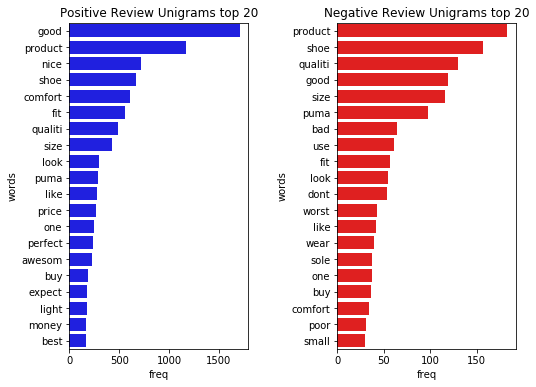

In [54]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])